<a href="https://colab.research.google.com/github/siddhartha42/Age-of-Information-Bandits/blob/main/MAB_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

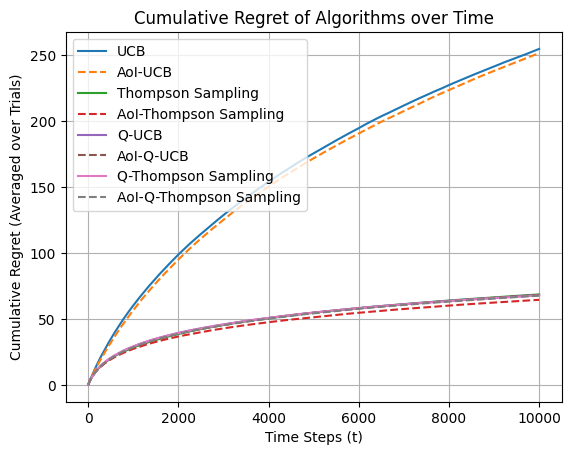

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
success_range = [0.1, 0.4]  # Range of success probabilities
num_arms = 5  # Number of arms
T = 10000  # Total time steps
num_trials = 1000

# Function to simulate an environment and compute cumulative regret for a specific algorithm
def simulate_environment(success_range, num_arms, T, algorithm_name):
    total_regrets = np.zeros(T)

    for _ in range(num_trials):
        true_success_probabilities = np.random.uniform(success_range[0], success_range[1], num_arms)
        estimated_probabilities = np.zeros(num_arms)
        total_rewards = np.zeros(num_arms)
        num_selections = np.zeros(num_arms)
        aoi_regret = 1
        cumulative_regret = 0

        for t in range(1, T + 1):
            if algorithm_name == "UCB":
                # Implement the UCB algorithm to select an arm to play
                arm_to_play = np.argmax(estimated_probabilities + np.sqrt(2 * np.log(t) / (num_selections + 1e-6)))

            elif algorithm_name == "AoI-UCB":
                # Implement the AoI-aware UCB algorithm
                alpha = estimated_probabilities * num_selections + 1
                beta = (1 - estimated_probabilities) * num_selections + 1
                limit = np.min((alpha + beta) / alpha)
                if aoi_regret < limit:
                    # Explore: Select an arm based on the UCB algorithm
                    arm_to_play = np.argmax(estimated_probabilities + np.sqrt(2 * np.log(t) / (num_selections + 1e-6)))
                else:
                    # Exploit: Select the arm with the highest estimated success probability
                    arm_to_play = np.argmax(estimated_probabilities)

            elif algorithm_name == "Thompson Sampling":
                # Implement the Thompson Sampling algorithm
                sampled_theta = np.random.beta(1 + total_rewards, 1 + num_selections - total_rewards)
                arm_to_play = np.argmax(sampled_theta)

            elif algorithm_name == "AoI-Thompson Sampling":
                # Implement the AoI-aware Thompson Sampling algorithm
                alpha = estimated_probabilities * num_selections + 1
                beta = (1 - estimated_probabilities) * num_selections + 1
                limit = np.min((alpha + beta) / alpha)
                if aoi_regret < limit:
                    # Explore: Select an arm based on the Thompson Sampling algorithm
                    sampled_theta = np.random.beta(1 + total_rewards, 1 + num_selections - total_rewards)
                    arm_to_play = np.argmax(sampled_theta)
                else:
                    # Exploit: Select the arm with the highest estimated success probability
                    arm_to_play = np.argmax(estimated_probabilities)

            elif algorithm_name == "Q-UCB":
                # Implement the Q-UCB algorithm
                alpha = estimated_probabilities * num_selections + 1
                beta = (1 - estimated_probabilities) * num_selections + 1
                sampled_theta = np.random.beta(alpha, beta)
                arm_to_play = np.argmax(sampled_theta)

            elif algorithm_name == "AoI-Q-UCB":
                # Implement the AoI-aware Q-UCB algorithm
                alpha = estimated_probabilities * num_selections + 1
                beta = (1 - estimated_probabilities) * num_selections + 1

                sampled_theta = np.random.beta(alpha, beta)
                arm_to_play = np.argmax(sampled_theta)


            elif algorithm_name == "Q-Thompson Sampling":
                # Implement the Q-Thompson Sampling algorithm
                alpha = estimated_probabilities * num_selections + 1
                beta = (1 - estimated_probabilities) * num_selections + 1
                sampled_theta = np.random.beta(alpha, beta)
                arm_to_play = np.argmax(sampled_theta)

            elif algorithm_name == "AoI-Q-Thompson Sampling":
                # Implement the AoI-aware Q-Thompson Sampling algorithm
                alpha = estimated_probabilities * num_selections + 1
                beta = (1 - estimated_probabilities) * num_selections + 1
                sampled_theta = np.random.beta(alpha, beta)
                arm_to_play = np.argmax(sampled_theta)

            # Simulate pulling the selected arm and observing a reward (0 or 1)
            reward = np.random.binomial(1, true_success_probabilities[arm_to_play])
            num_selections[arm_to_play] += 1
            total_rewards[arm_to_play] += reward
            estimated_probabilities[arm_to_play] = total_rewards[arm_to_play] / num_selections[arm_to_play]

            optimal_arm = np.argmax(true_success_probabilities)
            instantaneous_regret = true_success_probabilities[optimal_arm] - true_success_probabilities[arm_to_play]
            cumulative_regret += instantaneous_regret

            if "AoI" in algorithm_name:
                aoi_regret = aoi_regret + 1 if reward == 0 else 1

            total_regrets[t - 1] += cumulative_regret

    # Calculate the average regret over trials
    avg_regrets = total_regrets / num_trials
    return avg_regrets

# List of algorithm names
algorithms = ["UCB", "AoI-UCB", "Thompson Sampling", "AoI-Thompson Sampling", "Q-UCB", "AoI-Q-UCB", "Q-Thompson Sampling", "AoI-Q-Thompson Sampling"]

# Define line styles
line_styles = ['-', '--', '-', '--', '-', '--', '-', '--']

# Simulate the environment and compute cumulative regrets for each algorithm
regrets = {alg: simulate_environment(success_range, num_arms, T, alg) for alg in algorithms}

# Plot the cumulative regrets over time for all algorithms with appropriate line styles
plt.figure()
for i, alg in enumerate(algorithms):
    plt.plot(regrets[alg], label=alg, linestyle=line_styles[i])

plt.legend()
plt.xlabel("Time Steps (t)")
plt.ylabel("Cumulative Regret (Averaged over Trials)")
plt.title("Cumulative Regret of Algorithms over Time")
plt.grid(True)
plt.show()

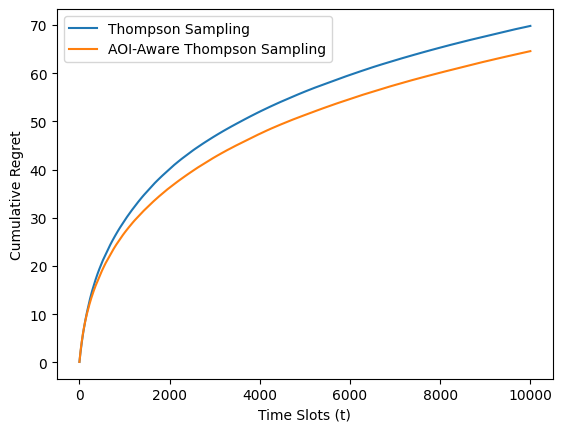

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate bandit environment with arms' success probabilities
def simulate_bandit(num_arms, success_prob_range):
    true_success_probabilities = np.random.uniform(success_prob_range[0], success_prob_range[1], num_arms)
    return true_success_probabilities

# Thompson Sampling Algorithm
def thompson_sampling(num_arms, T, true_success_probabilities):
    # Initialize variables
    cumulative_regret = np.zeros(T)
    estimated_success_probabilities = np.zeros(num_arms)
    arm_selections = np.zeros(num_arms)

    for t in range(T):
        alpha = estimated_success_probabilities * arm_selections + 1
        beta = (1 - estimated_success_probabilities) * arm_selections + 1

        sampled_theta = np.random.beta(alpha, beta)
        selected_arm = np.argmax(sampled_theta)

        reward = np.random.binomial(1, true_success_probabilities[selected_arm])

        estimated_success_probabilities[selected_arm] = (estimated_success_probabilities[selected_arm] * arm_selections[selected_arm] + reward) / (arm_selections[selected_arm] + 1)
        arm_selections[selected_arm] += 1

        best_arm = np.argmax(true_success_probabilities)
        regret = true_success_probabilities[best_arm] - true_success_probabilities[selected_arm]
        cumulative_regret[t] = cumulative_regret[max(t - 1, 0)] + regret

    return cumulative_regret

# AOI-Aware Thompson Sampling Algorithm
def aoi_aware_thompson_sampling(num_arms, T, true_success_probabilities):
    # Initialize variables
    cumulative_regret = np.zeros(T)
    estimated_success_probabilities = np.zeros(num_arms)
    arm_selections = np.zeros(num_arms)
    limit = np.zeros(T)
    aoi_regret = 1 # Initialize AOI regret

    for t in range(T):
        alpha = estimated_success_probabilities * arm_selections + 1
        beta = (1 - estimated_success_probabilities) * arm_selections + 1

        limit[t] = np.min((alpha + beta) / alpha)

        if aoi_regret < limit[t]:
            # Explore: Select an arm based on the Thompson Sampling algorithm
            sampled_theta = np.random.beta(alpha, beta)
            selected_arm = np.argmax(sampled_theta)
        else:
            # Exploit: Select the channel with the highest estimated success probability
            selected_arm = np.argmax(estimated_success_probabilities)

        reward = np.random.binomial(1, true_success_probabilities[selected_arm])

        estimated_success_probabilities[selected_arm] = (estimated_success_probabilities[selected_arm] * arm_selections[selected_arm] + reward) / (arm_selections[selected_arm] + 1)
        arm_selections[selected_arm] += 1

        best_arm = np.argmax(true_success_probabilities)
        regret = true_success_probabilities[best_arm] - true_success_probabilities[selected_arm]
        cumulative_regret[t] = cumulative_regret[max(t - 1, 0)] + regret

        if reward == 0:
            # Increment AOI regret on transmission failure
            aoi_regret += 1
        else:
            # Reset AOI regret on successful transmission
            aoi_regret = 1

    return cumulative_regret

# Main simulation
num_arms = 5
success_prob_range = [0.1, 0.4]
T = 10000
num_trials = 1000

average_regret_ts = np.zeros(T)
average_regret_aats = np.zeros(T)

for _ in range(num_trials):
    true_success_probabilities = simulate_bandit(num_arms, success_prob_range)
    regret_ts = thompson_sampling(num_arms, T, true_success_probabilities)
    regret_aats = aoi_aware_thompson_sampling(num_arms, T, true_success_probabilities)
    average_regret_ts += regret_ts
    average_regret_aats += regret_aats

average_regret_ts /= num_trials
average_regret_aats /= num_trials

# Plot the results
plt.figure()
plt.plot(average_regret_ts, label="Thompson Sampling")
plt.plot(average_regret_aats, label="AOI-Aware Thompson Sampling")
plt.xlabel("Time Slots (t)")
plt.ylabel("Cumulative Regret")
plt.legend()
plt.show()
